# 카메라 캘리브레이션

카메라 캘리브레이션(Camera Calibration)은 카메라의 정확한 성능을 평가하고 보정하기 위해 수행되는 과정입니다. 이 과정은 주로 카메라의 내부 파라미터(내부 메트릭스)를 추정하고, 왜곡된 이미지의 왜곡을 보정하는 데 사용됩니다.

### 1. 내부 파라미터(Intrinsic Parameters)
카메라 캘리브레이션에서 내부 파라미터는 카메라 센서와 렌즈의 특성을 나타냅니다. 이 파라미터에는 다음이 포함됩니다.
- **초점 거리(focal length):** 카메라 렌즈의 초점 거리.
- **주점(principal point):** 이미지 센서에서의 원점(기준점) 위치.
- **렌즈 왜곡(distortion coefficients):** 렌즈 왜곡을 설명하는 계수로, 특히 카메라 렌즈의 비구면 및 불균일함으로 인해 발생하는 이미지의 왜곡을 보정합니다.

### 2. 외부 파라미터(Extrinsic Parameters)
외부 파라미터는 카메라의 위치와 방향을 나타내며, 월드 좌표계에서 카메라의 위치와 방향을 설명합니다. 이 파라미터는 카메라가 촬영하는 대상과의 상대적인 위치를 알기 위해 중요합니다.

---

### 3. 캘리브레이션 과정
카메라 캘리브레이션은 일반적으로 다음 단계로 진행됩니다.
1. **이미지 촬영:** 바둑판 패턴(체커보드)과 같은 알려진 패턴이 있는 객체를 여러 각도에서 촬영합니다.
2. **특징점 검출:** 촬영한 이미지에서 바둑판 패턴의 코너 같은 특징점을 검출합니다.
3. **파라미터 추정:** 특징점의 위치를 기반으로 카메라의 내부 및 외부 파라미터를 추정합니다.
4. **보정:** 추정된 파라미터를 사용하여 이미지의 왜곡을 보정하고, 보정된 이미지를 생성합니다.

카메라 캘리브레이션은 컴퓨터 비전과 로보틱스 분야에서 매우 중요한 작업으로, 정확한 3D 재구성이나 물체 인식 등에 필수적입니다.

# 1. 호모그래피 계산

호모그래피(Homography)는 컴퓨터 비전에서 두 평면 간의 변환을 표현하는 수학적 개념입니다. 예를 들어, 하나의 이미지에서 특정 평면에 있는 객체를 다른 시점에서 촬영한 이미지로 변환하는 데 사용됩니다. 이를 통해 이미지 간의 대응 관계를 찾고 변환을 수행할 수 있습니다.

### 1. 호모그래피의 기본 개념

호모그래피 변환은 3D 공간에서 같은 평면에 있는 두 이미지 간의 점들을 서로 변환하는 방법을 제공합니다. 예를 들어, 두 이미지가 같은 평면을 촬영했을 때, 그 평면의 점들은 호모그래피를 통해 서로 매핑될 수 있습니다.

![alt text](https://docs.opencv.org/4.x/homography_transformation_example1.jpg)

호모그래피는 3x3 행렬 $\mathbf{H}$로 표현됩니다. 이 행렬은 다음과 같은 수식을 통해 정의됩니다:

$$
\mathbf{s}
\begin{bmatrix}
u \\
v \\
1
\end{bmatrix}
=
\mathbf{H} \cdot
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix}
$$

여기서:
- $(x, y)$는 원본 이미지의 좌표입니다.
- $(u, v)$는 변환된 이미지에서의 대응 좌표입니다.
- $\mathbf{H}$는 호모그래피 행렬입니다.
- $\mathbf{s}$는 스케일링 상수입니다.

---

### 2. 호모그래피 행렬의 구성

호모그래피 행렬 $\mathbf{H}$는 다음과 같이 구성됩니다:

$$
\mathbf{H} =
\begin{bmatrix}
h_{11} & h_{12} & h_{13} \\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & h_{33}
\end{bmatrix}
$$

이 행렬을 사용하여 원본 이미지의 좌표 $(x, y)$를 새로운 이미지의 좌표 $(u, v) $로 변환할 수 있습니다.

스케일링 상수 $\mathbf{s} = 1$ 일 때, 다음과 같이 행렬곱을 풀어보면:

$$
\begin{aligned}
u &= \frac{h_{11}x + h_{12}y + h_{13}}{h_{31}x + h_{32}y + h_{33}} \\
v &= \frac{h_{21}x + h_{22}y + h_{23}}{h_{31}x + h_{32}y + h_{33}}
\end{aligned}
$$

이 수식은 원본 이미지에서의 점 $(x, y)$가 변환된 이미지에서의 점 $(u, v)$로 어떻게 매핑되는지를 보여줍니다.

---

### 3. 동차 연립 방정식으로 표현

위의 수식을 동차 연립 방정식으로 표현하면, 다음과 같은 선형 방정식을 얻을 수 있습니다:

$$
\begin{aligned}
x(h_{11} - uh_{31}) + y(h_{12} - uh_{32}) + (h_{13} - uh_{33}) &= 0 \\
x(h_{21} - vh_{31}) + y(h_{22} - vh_{32}) + (h_{23} - vh_{33}) &= 0
\end{aligned}
$$

이 방정식은 각 대응점에 대해 두 개의 독립적인 방정식을 제공합니다.

---

### 4. 4개의 대응점을 통한 호모그래피 행렬 계산

호모그래피 행렬 $\mathbf{H}$를 결정하려면 최소한 4쌍의 대응점이 필요합니다. 대응점 $(x_i, y_i) \leftrightarrow (u_i, v_i)$는 원본 이미지와 변환된 이미지에서 같은 물체의 점들입니다. 예를 들어:

- $(x_1, y_1) \leftrightarrow (u_1, v_1)$
- $(x_2, y_2) \leftrightarrow (u_2, v_2)$
- $(x_3, y_3) \leftrightarrow (u_3, v_3) $
- $(x_4, y_4) \leftrightarrow (u_4, v_4) $

이 4개의 대응점에 대해 위에서 설명한 방정식을 세우면, 8개의 독립적인 방정식을 얻을 수 있습니다. 이 방정식들은 호모그래피 행렬의 8개의 미지수를 결정하는 데 사용됩니다(9개의 요소 중 하나는 `스케일링 상수로 설정`됩니다).

$$
\begin{aligned}
(x_1 \cdot h_{11} + y_1 \cdot h_{12} + h_{13}) - u_1 \cdot (x_1 \cdot h_{31} + y_1 \cdot h_{32} + h_{33}) &= 0 \\
(x_2 \cdot h_{11} + y_2 \cdot h_{12} + h_{13}) - u_2 \cdot (x_2 \cdot h_{31} + y_2 \cdot h_{32} + h_{33}) &= 0 \\
\vdots \\
(x_4 \cdot h_{11} + y_4 \cdot h_{12} + h_{13}) - u_4 \cdot (x_4 \cdot h_{31} + y_4 \cdot h_{32} + h_{33}) &= 0 \\
\end{aligned}
$$

이 방정식들을 행렬 형태로 정리하면, 다음과 같은 선형 시스템을 얻습니다:

$$
\mathbf{A} \mathbf{h} = \mathbf{0}
$$

여기서:
- $\mathbf{A}$는 $8 \times 9$ 행렬로, 각 방정식의 계수를 포함합니다.
- $\mathbf{h}$는 호모그래피 행렬의 벡터 표현 $[h_{11}, h_{12}, h_{13}, h_{21}, h_{22}, h_{23}, h_{31}, h_{32}, h_{33}]^T$입니다.

---

### 5. 행렬 $\mathbf{H}$의 계산

얻은 방정식을 행렬 형태로 정리한 후, 이를 풀어 호모그래피 행렬 $\mathbf{H}$를 계산할 수 있습니다.

- 최소 자승법으로 계산: 대응점에 잘못된 outlier가 없는 경우에 최적의 방법
- RANSAC 으로 계산: 적절한 임계치를 설정하여 좋은 lnlier로만 $\mathbf{H}$ 찾음.
- Least-Median 방법으로 계산: 임계치가 없음. lnlier가 50% 이상일 때 올바른 $\mathbf{H}$를 찾음.

## Side notes: Homogeneous Coordinate

### 1. 동차 좌표계란?

동차 좌표계는 2D 좌표 $(x, y)$를 3D 동차 좌표 $(x, y, 1)$로 확장하는 방식입니다. 이는 주로 변환을 행렬로 표현할 때 유용합니다.

### 2. 변환을 표현하기 위한 동차 좌표계의 장점

**1. 다양한 변환을 통합적으로 표현**

- **평행 이동 (Translation)**: 일반적인 2D 좌표계에서 평행 이동을 행렬로 표현하기 위해서는 추가적인 변환을 고려해야 합니다. 하지만 동차 좌표계에서는 평행 이동을 간단히 행렬 연산으로 통합할 수 있습니다.
- **회전 (Rotation)**: 2D 회전 변환은 $2 \times 2$ 행렬로 표현됩니다. 동차 좌표계에서는 회전 변환과 평행 이동을 결합하여 하나의 \(3 \times 3\) 행렬로 표현할 수 있습니다.
- **스케일링 (Scaling)**: 스케일링도 동차 좌표계에서는 간단히 $2 \times 2$ 행렬로 표현되지만, 전체 변환 행렬과 통합하여 $3 \times 3$ 행렬로 처리할 수 있습니다.

**2. 동차 좌표계에서의 변환 행렬**

동차 좌표계에서는 다양한 변환을 하나의 $(3 \times 3$) 행렬로 표현할 수 있습니다. 이 행렬은 다음과 같은 형태를 가집니다:

$$
\mathbf{T} =
\begin{bmatrix}
a & b & tx \\
c & d & ty \\
0 & 0 & 1
\end{bmatrix}
$$

여기서:
- $( a, b, c, d $)는 회전 및 스케일링을 나타내는 요소입니다.
- $( tx, ty $)는 평행 이동을 나타내는 요소입니다.
- 마지막 행은 동차 좌표계에서의 변환을 유지하기 위해 추가된 것입니다.

### 3. 동차 좌표계의 이점

**1. 통합된 표현**
동차 좌표계에서는 모든 변환 (회전, 평행 이동, 스케일링)을 하나의 행렬로 통합하여 표현할 수 있습니다. 이는 변환을 순차적으로 적용하는 것이 아닌, 단일 행렬 연산으로 변환을 수행할 수 있게 해줍니다.

**2. 변환의 일관성 유지**
동차 좌표계는 투영 기하학에서 매우 유용합니다. 특히 `3D 공간의 점을 2D 이미지로 변환할 때 발생하는 복잡한 변환을 일관되게 처리`할 수 있습니다. 동차 좌표계에서는 무한히 먼 점 (예: 소실점)을 표현할 수 있으며, 이를 통해 투영과 원근법을 자연스럽게 처리할 수 있습니다.

## Side notes: Homogeneous Liner System

동차 연립 방정식(Homogeneous Linear System)은 모든 방정식의 우변이 0인 연립 1차 방정식 시스템을 의미합니다. 다시 말해, 동차 연립 방정식은 다음과 같은 형태로 나타낼 수 있습니다:

$$
\mathbf{A} \mathbf{x} = \mathbf{0}
$$

여기서:
- $\mathbf{A}$는 계수 행렬입니다.
- $\mathbf{x}$는 미지수 벡터입니다.
- $\mathbf{0}$는 모든 성분이 0인 벡터입니다.

예를 들어, 두 개의 미지수를 갖는 동차 연립 방정식은 다음과 같이 쓸 수 있습니다:

$$
\begin{aligned}
a_1x_1 + b_1x_2 &= 0 \\
a_2x_1 + b_2x_2 &= 0
\end{aligned}
$$

### 동차 연립 방정식의 특징

1. **해**: 동차 연립 방정식 시스템은 항상 해를 가지며, 가장 기본적인 해는 모든 미지수가 0인 **자명해**(trivial solution)입니다. 예를 들어, $x_1 = 0$이고 $x_2 = 0$인 경우입니다.

2. **비자명해**: 만약 시스템이 자명해 외에도 다른 해를 갖는다면, 그 해를 **비자명해**(non-trivial solution)라고 합니다. 이는 행렬 $\mathbf{A}$의 행렬식이 0일 때 가능하며, 시스템에 무수히 많은 해가 존재할 수 있습니다.

### 호모그래피에서의 동차 연립 방정식

호모그래피 변환을 구할 때 사용하는 동차 연립 방정식은 각 대응점에 대해 생성된 방정식에서 비롯됩니다. 예를 들어, 호모그래피 행렬 $\mathbf{H}$를 사용해 변환된 점 $(u, v)$에 대해 다음과 같은 식을 얻었습니다:

$$
x(h_{11} - uh_{31}) + y(h_{12} - uh_{32}) + (h_{13} - uh_{33}) = 0
$$

이 식은 $\mathbf{H}$의 성분들 $h_{ij}$를 미지수로 하는 동차 연립 방정식을 나타냅니다. 여러 대응점에 대해 이러한 방정식을 세우면, 호모그래피 행렬을 구할 수 있는 선형 시스템이 만들어집니다.

이때 동차 연립 방정식을 푸는 과정에서 비자명해를 찾는 것이 중요하며, 이 비자명해가 호모그래피 행렬의 요소들을 결정합니다.

## 2. OpenCV의 호모그래피 계산

### 예제1. img1에서 img2로의 호모그래피 H를 patternSize = (9, 6)인 캘리브레이션 패턴을 사용하여 계산.

### 주목할 코드

* cv2.findChessboardConers 함수로 코너점을 찾고, cv2.cornerSubPix 함수로 부화소 수준으로 계산한 다음 정렬하는 함수
```python
def FindCornerPoints(src_img, patternSize):
    found, corners = cv2.findChessboardCorners(src_img, patternSize)
    if not found:
        raise Exception('Chessboard not found')
    term_crit = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1)

    gray = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)
    cv2.cornerSubPix(gray, corners, (5, 5), (-1, -1), term_crit)
    return found, corners
    #print('corners1.shape=', corners1.shape)
```

* `corners1`에서 `corners2`로의 호모그래피, H를 최소자승법으로 계산한다.
```python
#2
method = 0 #cv2.RANSAC, cv2.LMEDS
if method == 0:
    H, mask = cv2.findHomography(corners1, corners2, method)
else:
    H = cv2.findHomography(corners1, corners2, method, 2.0)
mask_matches = list(mask.flatten())
print('H=\n', H)
```

* 호모그리피 H를 이용하여 pts = corners * H를 계산한 후 corners1의 네 점과 대응하는 pts의 네 점을 각각 img1, img2에 출력한다.
```python
#3: perspective projection using 4-corners
pts = cv2.perspectiveTransform(corners1, H)  #pts = corners1 * H
index = [0, 8, 53, 45]
p1 = corners1[index]
p2 = pts[index]
```

corners1.shape= (54, 1, 2)
corners2.shape= (54, 1, 2)
H=
 [[  0.33  -1.25 538.01]
 [  0.7   -0.09 -81.09]
 [  0.    -0.     1.  ]]


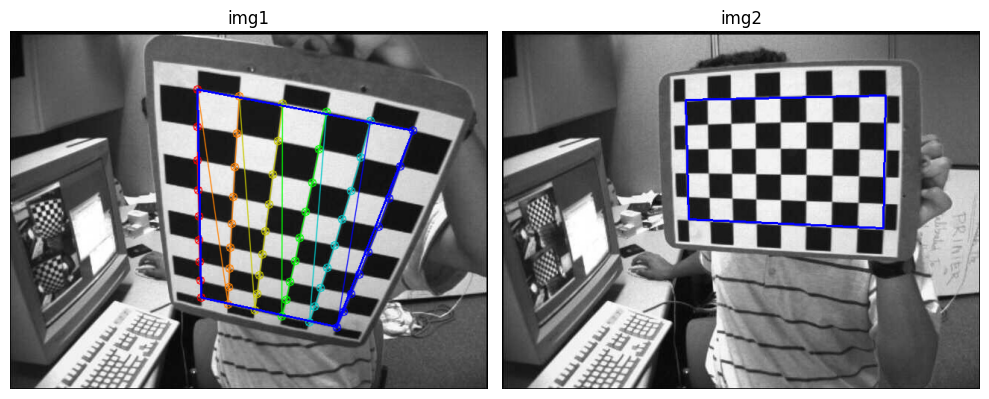

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress=True)

#1
img1 = cv2.imread('/content/drive/MyDrive/Image/homography_source_desired_images(1).jpg')
img2 = cv2.imread('/content/drive/MyDrive/Image/homography_source_desired_images(2).jpg')

def FindCornerPoints(src_img, patternSize):
    found, corners = cv2.findChessboardCorners(src_img, patternSize)
    if not found:
        raise Exception('Chessboard not found')
    term_crit = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1)


    gray = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)
    cv2.cornerSubPix(gray, corners, (5, 5), (-1, -1), term_crit)
    return found, corners
    #print('corners1.shape=', corners1.shape)

patternSize = (9, 6)
found1, corners1 = FindCornerPoints(img1, patternSize)
print('corners1.shape=', corners1.shape)

found2, corners2 = FindCornerPoints(img2, patternSize)
print('corners2.shape=', corners2.shape)

#2
method = 0 #cv2.RANSAC, cv2.LMEDS

if method == 0:
    H, mask = cv2.findHomography(corners1, corners2, method)
else:
    H = cv2.findHomography(corners1, corners2, method, 2.0)

mask_matches = list(mask.flatten())
print('H=\n', H)

#3: perspective projection using 4-corners
pts = cv2.perspectiveTransform(corners1, H)  #pts = corners1 * H

index = [0, 8, 53, 45]
p1 = corners1[index]
p2 = pts[index]

#4
cv2.drawChessboardCorners(img1, patternSize, corners1, found1)
img1 = cv2.polylines(img1, [np.int32(p1)], True, (255, 0, 0), 2)

#5
#cv2.drawChessboardCorners(img2, patternSize, corners2, found2)
#img2 = cv2.polylines(img2, [np.int32(corners[index])], True, (255, 0, 0), 2)

img2 = cv2.polylines(img2, [np.int32(p2)], True, (255, 0, 0), 2)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axs[0].set_title('img1')
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axs[1].set_title('img2')
axs[1].axis('off')

plt.tight_layout()


### 예제2: Z=0 평면 세계(world) 좌표와 영상의 코너점 사이의 호모그래피

![alt text](https://docs.opencv.org/4.x/homography_transformation_example2.jpg)

### 주목할 코드

* 코너점을 left-top 기준으로 정렬
```python
def FindCornerPoints(src_img, patternSize):
    ...
    #reverse order, in this example, to set origin to (left-upper)
    #책에서는 left-upper인데 코드 열어보니 오른쪽 하단부터임
    corners = corners[::-1]
    return found, corners
```

* 3차원 세계 좌표 mW를 생성.
![World coordinate](https://drive.google.com/uc?id=16H9jM0gGmAxFCx1fGVrrSvJoOTSNpWi9)
```python
#2: set world(object) coordinates to Z = 0
xN, yN = patternSize            #(9, 6)
mW = np.zeros((xN * yN, 3))     #(54, 3)
#mW points on Z = 0
#np.mgrid[0:xN, 0:yN].shape = (2, yN, xN) -> (xN, yN, 2) -> (xN * yN , 2)
mW[:, :2] = np.mgrid[0:xN, 0:yN].T.reshape(-1, 2)
#(1, 1, 0) : coord of the start corner point in the pattern
#mW *= 3.8
```
* mW(3차원 world coor)에서 (N, 1, 2)로 변환한 후, 4개의 점 pW(4, 1, 2)을 추출, p1, p2로 투영변환(함수 내부적으로 Homogeneous coor로 변환)
```python
#4: perspective projections
mW = mW[:, :2].reshape(-1, 1, 2)  #mW.shape:(54, 3) -> (54, 1, 2)
pW = mW[[0, 8, 53, 45]]           #4 - corners
p1 = cv2.perspectiveTransform(pW, H1)
p2 = cv2.perspectiveTransform(pW, H2)
```


* $\mathbf{H}$와 $\mathbf{H_1}$를 행렬곱 하여 연속적인 호모그래피 $\mathbf{H_3}$계산. (World coor -> corners1 -> corners2 호모그래피$\mathbf{H_3}$ 와 World coor -> corners2 호모그래피 $\mathbf{H_2}$ 비교)
```python
#5
H3 = np.dot(H, H1)          #H3 == H2 with some errors
#pW = cv2.convertPointsFromHomogeneous(pW.T)
p3 = cv2.perspectiveTransform(pW, H3)
#print('p3=\n', p3) #p3 = H3 * pW = H * H1 * pW = p2 with some errors

* cv2.perspectiveTransform(pW, H1) 풀어써보기(1) : pW(4, 1, 2) -> pW(4, 2) -> 동차좌표계 pW(4, 1, 3) -> 투영변환 p4(4, 1, 3)-> 정규화 ($(x', y' ,1)$는 $x' = \frac{x}{w}$, $y' = \frac{y}{w}$)
```python
#6: perspective projections using matrix multiplications
#6-1: p4 rows are p1's homogeneous coords
pW = pW.reshape(-1, 2)    #rows are points
pW = cv2.convertPointsToHomogeneous(pW)  #shape : (4, 2) -> (4, 1, 3)
p4 = np.dot(pW, H1.T)
p4 = p4.reshape(-1, 3) / p4[:, :, 2]
#print('p4=', p4)       #shape : (4, 3): rows are points
```

* cv2.perspectiveTransform(pW, H1) 풀어써보기(2)
```python
#6-2: p5 colums are p1's homogeneous coords
pW = pW.reshape(-1, 3).T             #shape = (3, 4)
p5 = np.dot(H1, pW)
p5 = p5 / p5[2]
#print('p5=', p5)                   #shape = (3, 4): colums  are points
```

corners1.shape= (54, 1, 2)
corners2.shape= (54, 1, 2)
H1=
 [[ 19.64 -57.03 544.74]
 [ 63.36 -10.42 130.75]
 [  0.07   0.01   1.  ]]
H2=
 [[-29.07  -2.9  514.12]
 [  2.54 -37.32 266.5 ]
 [  0.02  -0.01   1.  ]]
H=
 [[  0.33  -1.25 538.04]
 [  0.7   -0.09 -80.89]
 [  0.    -0.     1.  ]]
p1=
 [[[544.74 130.75]]

 [[439.74 399.5 ]]

 [[255.04 358.34]]

 [[250.11  75.76]]]
p2=
 [[[514.12 266.5 ]]

 [[249.13 253.8 ]]

 [[244.3   91.69]]

 [[518.81  82.99]]]
H3=
 [[-32.42  -1.84 555.68]
 [  2.12 -39.52 288.03]
 [  0.01  -0.     1.08]]
p3=
 [[[513.32 266.07]]

 [[247.62 254.9 ]]

 [[244.62  91.51]]

 [[515.73  85.32]]]
pW= [[0. 0.]
 [8. 0.]
 [8. 5.]
 [0. 5.]]
pW= [[[0. 0. 1.]]

 [[8. 0. 1.]]

 [[8. 5. 1.]]

 [[0. 5. 1.]]]
p4= [[[544.74 130.75   1.  ]]

 [[701.89 637.66   1.6 ]]

 [[416.75 585.54   1.63]]

 [[259.59  78.63   1.04]]]
p4= [[544.74 130.75   1.  ]
 [439.74 399.5    1.  ]
 [255.04 358.34   1.  ]
 [250.11  75.76   1.  ]]
p5= [[544.74 439.74 255.04 250.11]
 [130.75 399.5  358.34  75.

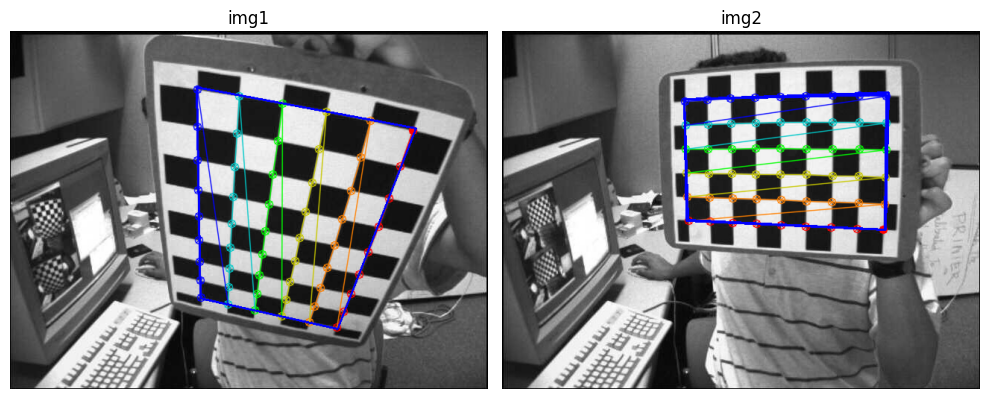

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress=True)

#1
img1 = cv2.imread('/content/drive/MyDrive/Image/homography_source_desired_images(1).jpg')
img2 = cv2.imread('/content/drive/MyDrive/Image/homography_source_desired_images(2).jpg')

def FindCornerPoints(src_img, patternSize):
    found, corners = cv2.findChessboardCorners(src_img, patternSize)
    if not found:
        raise Exception('Chessboard not found')
    term_crit = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1)


    gray = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)
    corners = cv2.cornerSubPix(gray, corners, (5, 5), (-1, -1), term_crit)

    #reverse order, in this example, to set origin to (left-upper)
    corners = corners[::-1]
    return found, corners
    #print('corners1.shape=', corners1.shape)

patternSize = (9, 6)
found1, corners1 = FindCornerPoints(img1, patternSize)
print('corners1.shape=', corners1.shape)

found2, corners2 = FindCornerPoints(img2, patternSize)
print('corners2.shape=', corners2.shape)

#2: set world(object) coordinates to Z = 0
xN, yN = patternSize   #(9, 6)
mW = np.zeros((xN * yN, 3))     #(54, 3)

#mW points on Z = 0
mW[:, :2] = np.mgrid[0:xN, 0:yN].T.reshape(-1, 2)

#(1, 1, 0) : coord of the start corner point in the pattern
#mW *= 3.8

#3: calculate homography
method = cv2.LMEDS         #cv2.RANSAC
H1, mask = cv2.findHomography(mW, corners1, method, 2.0)
H2, mask = cv2.findHomography(mW, corners2, method, 2.0)
H, mask = cv2.findHomography(corners1, corners2, method, 2.0)

mask_matches = list(mask.flatten())
print('H1=\n', H1)
print('H2=\n', H2)
print('H=\n', H)

#4: perspective projections
mW = mW[:, :2].reshape(-1, 1, 2)  #mW.shape:(18, 3) -> (18, 1, 2)
pW = mW[[0, 8, 53, 45]]           #4 - corners
p1 = cv2.perspectiveTransform(pW, H1)
p2 = cv2.perspectiveTransform(pW, H2)
print('p1=\n', p1)
print('p2=\n', p2)

#5
H3 = np.dot(H, H1)          #H3 == H2 with some errors
print('H3=\n', H3)

#pW = cv2.convertPointsFromHomogeneous(pW.T)
p3 = cv2.perspectiveTransform(pW, H3)
print('p3=\n', p3) #p3 = H3 * pW = H * H1 * pW = p2 with some errors

#6: perspective projections using matrix multiplications
#6-1: p4 rows are p1's homogeneous coords
pW = pW.reshape(-1, 2)    #rows are points
pW = cv2.convertPointsToHomogeneous(pW)  #shape : (4, 2) -> (4, 1, 3)
p4 = np.dot(pW, H1.T)
p4 = p4.reshape(-1, 3) / p4[:, :, 2]
print('p4=', p4)       #shape : (4, 3): rows are points

#6-2: p5 colums are p1's homogeneous coords
pW = pW.reshape(-1, 3).T             #shape = (3, 4)
p5 = np.dot(H1, pW)
p5 = p5 / p5[2]
print('p5=', p5)                   #shape = (3, 4): colums  are points

#7: display points
#7-1: start coner point in the pattern: (1, 1) in this example
x, y = corners1[0, 0]   #p1[0][0]
cv2.circle(img1, (int(x), int(y)), 5, (0, 0, 255), -1)

x, y = corners2[0, 0]   #p2[0][0]
cv2.circle(img2, (int(x), int(y)), 5, (0, 0, 255), -1)

#7-2: p1 = H1 * pW
cv2.drawChessboardCorners(img1, patternSize, corners1, found1)
img1 = cv2.polylines(img1, [np.int32(p1)], True, (255, 0, 0), 2)

#7-3: p2 = H2 * pW
cv2.drawChessboardCorners(img2, patternSize, corners2, found2)
img2 = cv2.polylines(img2, [np.int32(p2)], True, (255, 0, 0), 2)

#7-4: p3 = H3 * pW
img2 = cv2.polylines(img2, [np.int32(p3)], True, (255, 0, 0), 2)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axs[0].set_title('img1')
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axs[1].set_title('img2')
axs[1].axis('off')

plt.tight_layout()

# 2. 핀홀 카메라 모델

캘리브레이션에서 투영 변환 행렬(Projection Transformation Matrix)은 3D 공간의 점을 2D 이미지 평면에 투영하는 과정을 수학적으로 표현한 것입니다. 이 행렬은 카메라의 내부 파라미터와 외부 파라미터를 결합하여 3D 좌표를 2D 좌표로 변환하는 데 사용됩니다.

* 카메라 좌표계와 세계 좌표계의 `principal axis`가 일치 할 때의 투영.
![alt text](https://hedivision.github.io/images/pn.jpg)

* 일치하지 않을 경우 회전행렬$\mathbf{R}$과 이동 벡터$\mathbf{t}$로 일치시켜야 함.
![alt text](https://www.mathworks.com/help/vision/ug/calibration-cameramodel-coords.png)



### 1. 투영 변환 행렬의 구성
투영 변환 행렬은 일반적으로 다음과 같이 구성됩니다:

$$
\mathbf{P} = \mathbf{K} \cdot [\mathbf{R} \mid \mathbf{t}]
$$

여기서:

- **$(\mathbf{P}$)**: 3x4 투영 변환 행렬입니다. 이 행렬은 3D 점을 2D 이미지 평면에 매핑하는 역할을 합니다.
- **$(\mathbf{K}$)**: 3x3 내부 파라미터 행렬 (Intrinsic Matrix)입니다. 이 행렬은 카메라의 초점 거리와 주점 등을 포함합니다.
  $$
  \mathbf{K} =
  \begin{bmatrix}
  f_x & 0 & c_x \\
  0 & f_y & c_y \\
  0 & 0 & 1
  \end{bmatrix}
  $$
  - $(f_x, f_y$): x, y 방향의 초점 거리.
  - $(c_x, c_y$): 이미지 센서에서의 주점(principal point)의 좌표.
  
- **$([\mathbf{R} \mid \mathbf{t}]$)**: 3x4 외부 파라미터 행렬 (Extrinsic Matrix)입니다. 이 행렬은 카메라의 회전 행렬$\mathbf{R}$과 이동 벡터$\mathbf{t}$로 구성되어 있습니다. 이 파라미터는 월드 좌표계에서 카메라의 위치와 방향을 설명합니다.
  $$
  [\mathbf{R} \mid \mathbf{t}] =
  \begin{bmatrix}
  r_{11} & r_{12} & r_{13} & t_x \\
  r_{21} & r_{22} & r_{23} & t_y \\
  r_{31} & r_{32} & r_{33} & t_z
  \end{bmatrix}
  $$

### 2. 투영 과정
투영 변환 행렬을 사용하면 3D 점 $\mathbf{X} = (X, Y, Z, 1)^T$를 2D 이미지 평면의 점 $\mathbf{x} = (x, y, 1)^T$로 변환할 수 있습니다. 이 과정은 다음과 같은 행렬 곱셈으로 표현됩니다:

$$
\mathbf{P} = \mathbf{K} \cdot [\mathbf{R} \mid \mathbf{t}]
$$

$$
\mathbf{x} = \mathbf{P} \cdot \mathbf{X}
$$

구체적으로는:

$$
\begin{bmatrix}
x \\
y \\
w
\end{bmatrix}
=
\mathbf{P} \cdot
\begin{bmatrix}
X \\
Y \\
Z \\
1
\end{bmatrix}
$$

여기서 $w$는 균일 좌표(homogeneous coordinates)의 스케일링 요소이며, 2D 이미지 좌표 $(x', y')$는 $x' = \frac{x}{w}$, $y' = \frac{y}{w}$로 계산됩니다.





## OpenCV에서 카메라 캘리브레이션


1. 내부 파라미터 $\mathbf{K}$를 계산한다.

2. 왜곡 계수 distCoeffs를 0으로 초기화한다.

3. cv2.solvePnP() 함수를 사용하여 카메라 자세 $\mathbf{R}$, $t$를 추정한다.

4. Levenberg-Marqaurdt 최적화 알고리즘으로 cv2.projectPoint()에 의한 재투영 오차 reprojection error를 최소화하여 파라미터를 계산한다.

1. 두 영상(image1, image2)에서 패턴의 코너점을 corner1, corner2에 검출한다.
```python
#1
def FindCornerPoints(src_img, patternSize):
    ...
    return found, corners
patternSize = (9, 6)
found1, corners1 = FindCornerPoints(img1, patternSize)
found2, corners2 = FindCornerPoints(img2, patternSize)
```

2. 패턴의 Z = 0 평면에서 세계(물체) 좌표를 mW에 설정한다.
```python
#2 Set world(object) coordinates to Z = 0
xN, yN = patternSize             # (9, 6)
#Homo coords 가 아니라 2차원 좌표임.
mW = np.zeros((xN * yN, 3), np.float32)     # (54, 3)
#mW points on Z = 0
mW[:, :2] = np.mgrid[0:xN, 0:yN].T.reshape(-1, 2)
mW[:, :2] += 1
```
![alt text](https://patentimages.storage.googleapis.com/e8/ef/02/18f09d33b7ce21/112006047820977-pat00115.png)

3. 3차원 물체 좌표(obj_points)와 2차원 영상 좌표(img_points)의 대응관계를 리스트로 생성한다.
```python
#3: 3D(obj_points) <--> 2D(img_points)
obj_points = [mW, mW]
img_points = [corners1, corners2]
```

4. 카메라를 캘리브레이션 한다.

* #4-1. cv2.initCameraMatrix2D로 초기 카메라 행렬을 K에 계산한다. (K : 내부 파라미터 3*3 행렬)
```python
#4: calibrate camera
#4-1
# image
# K = cv2.initCameraMatrix2D(obj_points, img_points, imageSize)
# print('initial K=\n', K)
```

* #4-2. cv2.calibrateCamera()로 카메라 행렬 K, 회전벡터 rvecs, 이동벡터 tvecs, 왜곡계수 dists, 투영오차 errors를 계산한다.
```python
#4-2
errors, K, dists, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, imageSize, None, None)
print('calibrateCamera: errors=', errors)
```

* #4-3.
```python
#4-3
# iFixedPoint = 1 # [ 1, len(obj_points[0])-2]
# errors K, dists, rvecs, tvecs, newObjPoints = cv2.calibrateCameraRO(obj_points, img_points, imageSize, iFixedPoint, None, None)
# print('calibrateCameraRO: errors=', errors)
```

* #4-4. np.savez()로 'K_dist.npz' 파일에  K, dists, rvecs, tvecs를 저장한다.
```python
#4-4
np.savez('/content/drive/MyDrive/Image/K_dist.npz', K=K, dists=dists, rvecs = rvecs, tvecs = tvecs)
print('calibrated K=\n', K)
print('dists =', dists)
```

5. 캘리브레이션 정보를 이용하여 두 영상에 3차원 축(axis3d)를 표시하고, Z = 0평면의 4개 코너점 pW = mW[index]와 Z = -2 평면의 pW[:, 2] = -2의 4개의 코너점을 사각형과 에지로 연결한 6면체를 각각의 영상에 투영한다. (Z = 0 평면에서 카메라를 바라보는 바깥쪽 방향이 -Z축이다.)
```python
#5: display, project, and re-projection errors
index = [0, 8, 53, 45]            # 4-corner index
axis3d = np.float32([[0, 0, 0], [3, 0, 0], [0, 3, 0], [0, 0, -3]]).reshape(-1, 3)
# -Z: towords the camera
```

* #5-1. 각 영상에 대한 카메라의 자세(외부 파라미터)를 출력한다. cv2.Rodrigues(rvecs[i])에 의해 3 * 3 회전 행렬로 변환한다.
```python
for i in range(2):
#5-1
    print(f'tvecs[{i}]={tvecs[i].T}')
    print(f'rvecs[{i}]={rvecs[i].T}')

    R = cv2.Rodrigues(rvecs[i])[0]
    print(f'R[{i}]=\n{R}')
```

* #5-2, 3. 3차원 좌표 axis3d를 카메라 캘리브레이션 정보를 이용하여 cv2.projectPoint()로 2차원 좌표 axis_2d로 투영한다. 그리고 cv2.line을 이용하여 선을 그린다.
```python
#5-2
    if i == 0:
        img = img1
    else:
        img = img2
#5-3: display axis
    axis_2d = cv2.projectPoints(axis3d, rvecs[i], tvecs[i], K, dists)[0]
    axis_2d = np.int32(axis_2d).reshape(-1, 2)
    cv2.line(img, tuple(axis_2d[0]), tuple(axis_2d[1]), (0, 0, 255), 5)
    cv2.line(img, tuple(axis_2d[0]), tuple(axis_2d[2]), (0, 255, 0), 5)
    cv2.line(img, tuple(axis_2d[0]), tuple(axis_2d[3]), (255, 0, 0), 5)

* #5-4. 마찬가지로 3차원 좌표인 pW를 2차원 p1으로 투영하여 그린다.
```python
#5-4: display pW on Z = 0
    pW = mW[index]               #'4 - corners' coord (x, y, 0)
    p1 = cv2.projectPoints(pW, rvecs[i], tvecs[i], K, dists)[0]
    p1 = np.int32(p1)

    cv2.drawContours(img, [p1], -1, (0, 255, 255), -1)
    cv2.polylines(img, [p1], True, (0, 255, 0), 2)
```

* #5-5,6. 직육면체를 만들기 위해 Z = -2 평면의 3차원 모서리 좌표를 2차원 p2으로 투영하여 그린다. 그리고 #5-6 에서 에지를 연결한다.
```python
#5-5: display pW on Z = -2
    pW[:, 2] = -2                #'4 - corners' coord (x, y, -2)
    p2 = cv2.projectPoints(pW, rvecs[i], tvecs[i], K, dists)[0]
    p2 = np.int32(p2)
    cv2.polylines(img, [p2], True, (255, 0, 0), 2)
#5-6: display edges between two rectangles
    for j in range(4):
        x1, y1 = p1[j][0]             #Z = 0
        x2, y2 = p2[j][0]             #Z = -2
        cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
```

* #5-7. 3차원 세계 좌표 mW를 각 영상에 2차원 pts로 투영한 다음 코너점과의 거리를 계산하여 투영 오차를 계산한다.
```python
#5-7: re-projection errors
    pts = cv2.projectPoints(mW, rvecs[i], tvecs[i], K, dists)[0] #4-2
    #pts = cv2.projectPoints(newObjPoints, rvecs[i], tvecs[i], K, dists)[0] #4-3

    if i == 0:
        errs = cv2.norm(corners1, np.float32(pts))
    else:
        errs = cv2.norm(corners2, np.float32(pts))
    print(f'errs[{i}]={errs}')
```

calibrateCamera: errors= 0.16955294948664945
calibrated K=
 [[531.01   0.   340.03]
 [  0.   531.41 233.02]
 [  0.     0.     1.  ]]
dists = [[-0.25 -0.28  0.   -0.    1.19]]
tvecs[0]=[[-3.34  3.91 14.81]]
rvecs[0]=[[ 0.41  0.66 -1.34]]
R[0]=
[[ 0.09  0.98  0.2 ]
 [-0.75  0.2  -0.63]
 [-0.65 -0.09  0.75]]
errs[0]=1.2244029290319403
tvecs[1]=[[-3.88 -5.3  15.98]]
rvecs[1]=[[0.16 0.28 0.01]]
R[1]=
[[ 0.96  0.01  0.28]
 [ 0.04  0.99 -0.16]
 [-0.27  0.16  0.95]]
errs[1]=1.2671352368237274


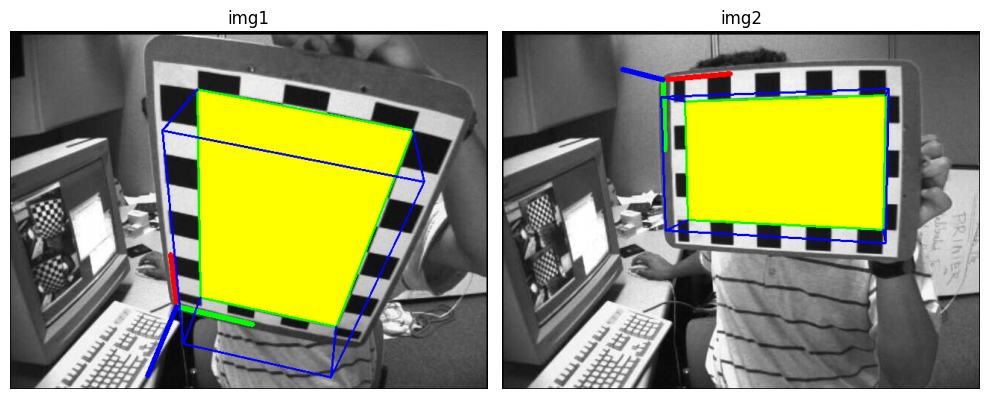

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2, suppress=True)


#1
#1
img1 = cv2.imread('/content/drive/MyDrive/Image/homography_source_desired_images(1).jpg')
img2 = cv2.imread('/content/drive/MyDrive/Image/homography_source_desired_images(2).jpg')
imageSize = (img1.shape[1], img1.shape[0])  #(width, height)

def FindCornerPoints(src_img, patternSize):
    found, corners = cv2.findChessboardCorners(src_img, patternSize)
    if not found:
        raise Exception('Chessboard not found')
    term_crit = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
    gray = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)
    cv2.cornerSubPix(gray, corners, (5, 5), (-1, -1), term_crit)
#   reverse order, in this example, to set origin to (left-upper)
    #corners = corners[::-1]
    return found, corners

patternSize = (9, 6)
found1, corners1 = FindCornerPoints(img1, patternSize)
found2, corners2 = FindCornerPoints(img2, patternSize)

#2 Set world(object) coordinates to Z = 0
xN, yN = patternSize             # (9, 6)
#Homo coords 가 아니라 2차원 좌표임.
mW = np.zeros((xN * yN, 3), np.float32)     # (54, 3)
#mW =  points on Z = 0

#mW points on Z = 0
mW[:, :2] = np.mgrid[0:xN, 0:yN].T.reshape(-1, 2)
mW[:, :2] += 1

#3: 3D(obj_points) <--> 2D(img_points)
obj_points = [mW, mW]
img_points = [corners1, corners2]

#4: calibrate camera
#4-1
# image
# K = cv2.initCameraMatrix2D(obj_points, img_points, imageSize)
# print('initial K=\n', K)

#4-2
errors, K, dists, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, imageSize, None, None)
print('calibrateCamera: errors=', errors)

#4-3
# iFixedPoint = 1# [ 1, len(obj_points[0])-2]
# errors K, dists, rvecs, tvecs, newObjPoints = cv2.calibrateCameraRO(obj_points, img_points, imageSize, iFixedPoint, None, None)
# print('calibrateCameraRO: errors=', errors)

#4-4
np.savez('/content/drive/MyDrive/Image/K_dist.npz', K=K, dists=dists, rvecs = rvecs, tvecs = tvecs)

print('calibrated K=\n', K)
print('dists =', dists)

#5: display, project, and re-projection errors
index = [0, 8, 53, 45]            # 4-corner index
axis3d = np.float32([[0, 0, 0], [3, 0, 0], [0, 3, 0], [0, 0, -3]]).reshape(-1, 3)
# -Z: towords the camera


for i in range(2):
#5-1
    print(f'tvecs[{i}]={tvecs[i].T}')
    print(f'rvecs[{i}]={rvecs[i].T}')

    R = cv2.Rodrigues(rvecs[i])[0]
    print(f'R[{i}]=\n{R}')

#5-2
    if i == 0:
        img = img1
    else:
        img = img2
#5-3: display axis
    axis_2d = cv2.projectPoints(axis3d, rvecs[i], tvecs[i], K, dists)[0]
    axis_2d = np.int32(axis_2d).reshape(-1, 2)
    cv2.line(img, tuple(axis_2d[0]), tuple(axis_2d[1]), (0, 0, 255), 5)
    cv2.line(img, tuple(axis_2d[0]), tuple(axis_2d[2]), (0, 255, 0), 5)
    cv2.line(img, tuple(axis_2d[0]), tuple(axis_2d[3]), (255, 0, 0), 5)

#5-4: display pW on Z = 0
    pW = mW[index]               #'4 - corners' coord (x, y, 0)
    p1 = cv2.projectPoints(pW, rvecs[i], tvecs[i], K, dists)[0]
    p1 = np.int32(p1)

    cv2.drawContours(img, [p1], -1, (0, 255, 255), -1)
    cv2.polylines(img, [p1], True, (0, 255, 0), 2)

#5-5: display pW on Z = -2
    pW[:, 2] = -2                #'4 - corners' coord (x, y, -2)
    p2 = cv2.projectPoints(pW, rvecs[i], tvecs[i], K, dists)[0]
    p2 = np.int32(p2)
    cv2.polylines(img, [p2], True, (255, 0, 0), 2)

#5-6: display edges between two rectangles
    for j in range(4):
        x1, y1 = p1[j][0]             #Z = 0
        x2, y2 = p2[j][0]             #Z = -2
        cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

#5-7: re-projection errors
    pts = cv2.projectPoints(mW, rvecs[i], tvecs[i], K, dists)[0] #4-2
    #pts = cv2.projectPoints(newObjPoints, rvecs[i], tvecs[i], K, dists)[0] #4-3

    if i == 0:
        errs = cv2.norm(corners1, np.float32(pts))
    else:
        errs = cv2.norm(corners2, np.float32(pts))
    print(f'errs[{i}]={errs}')

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axs[0].set_title('img1')
axs[0].axis('off')

axs[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axs[1].set_title('img2')
axs[1].axis('off')

plt.tight_layout()

## 비디오에서 카메라 캘리브레이션

```python
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
np.set_printoptions(precision=2, suppress=True)

#1: open video capture
cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture('/content/drive/MyDrive/Image/calibration_video.mp4')
if (not cap.isOpened()):
    print('Error opening video')
    import sys
    sys.exit()
height, width = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)), int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
imageSize = width, height

#2
patternSize = (9, 5)
def FindCornerPoints(src_img, patternSize):
    found, corners = cv2.findChessboardCorners(src_img, patternSize)
    if not found:
        return found, corners

    term_crit = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
    gray = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)
    cv2.cornerSubPix(gray, corners, (5, 5), (-1, -1), term_crit)
#   revers order, in this example, to set origin to (left-upper)
    corners = corners[::-1]
    return found, corners

#3: set world(object) coordinates to Z = 0
xN, yN = patternSize    #(9, 5)
mW = np.zeros((xN * yN, 3), np.float32)
#mW points on Z = 0

mW[:, :2] = np.mgrid[0:xN, 0:yN].T.reshape(-1, 2)
#(1, 1, 0): coord of the start corner point in the pattern
mW[:, :2] += 1

#4: load camera matrix X
# with np.load('/content/drive/MyDrive/Image/K_dist.npz') as X:
#     K = X['K']
#     dists = X['dists']
# dists = np.zeros(5)
# print('K=\n', K)
# print('dists=', dists)

#5: calculate K from obj_point, img_points
t = 0
count = 0
N_FRAMES  = 10
obj_points = []
img_points = []

while True:
#5-1: build obj_points, img_points
    ret, frame = cap.read()
    if not ret:
        break
    found, corners = FindCornerPoints(frame, patternSize)
    if not found:
        cv2_imshow('frame', frame)
        key = cv2.waitKey(20)
        if key == 27:
            break
        continue

    t += 1
    if t % 10 != 0:      #sample
        continue

    if found and cound<N_FRAMES:

        obj_points.append(mW)
        img_points.append(corners)
        cv2.drawChessboardCorners(frame, patternSize, corners, found)

        count += 1

    else:
        break

    cv2_imshow('frame', frame)
    key = cv2.waitKey(20)
    if key == 27:
        break

#5-2: calibrate camera matrix
K = cv2.initCameraMatrix2D(obj_points, img_points, imageSize)
print('calibrated K=\n', K)

errors, K, dists = cv2.calibrateCamera(obj_points, img_points, imageSize, None, None)[:3]

np.savez('/content/drive/MyDrive/Image/calib_1109.npz', K=K, dists=dists)
print('calibrated K=\n', K)
print('dists=', dists)

#6: calibrate rvec and tvec, draw axis, object, errors
index = [0, 8, 53, 45]    #4-corners index
axis3d = np.float32([[0, 0, 0], [3, 0, 0], [0, 3, 0], [0, 0, -3]]).reshape(-1, 3)

t = 0 #frame counter
while True:
#6-1
    ret, frame = cap.read()
    if not ret:
        break

    found, corners = FindCornerPoints(frame, patternSize)
    if not found:
        cv2_imshow('frame', frame)
        key = cv2.waitKey(20)
        if key == 27:
            break
        continue

    ret, rvec, tvec = cv2.solvePnP(mW, corners, K, dists)

#6-2
    axis_2d = cv2.projectPoints(axis3d, rvec, tvec, K, dists)[0]
    axis_2d = np.int32(axis_2d).reshape(-1, 2)
    cv2.line(frame, tuple(axis_2d[0]), tuple(axis_2d[1]), (0, 0, 255), 3)
    cv2.line(frame, tuple(axis_2d[0]), tuple(axis_2d[2]), (0, 255, 0), 3)
    cv2.line(frame, tuple(axis_2d[0]), tuple(axis_2d[3]), (255, 0, 0), 3)

#6-3: display pW on Z = 0
    pW = mW[index]          # 4-corner's coord (x, y, 0)
    p1 = cv2.projectPoints(pW, rvec, tvec, K, dists)[0]
    p1 = np.int32(p1)

    cv2.drawContours(frame, [p1], -1, (0, 255, 255), -1)
    cv2.polylines(frame, [p1], True, (0, 255, 0), 2)

#6-4: display pW on Z = -2
    pW[:, 2] = -2           # 4-corner's coord (x, y, -2)
    p2 = cv2.projectPoints(pW, rvec, tvec, K, dists)[0]
    p2 = np.int32(p2)
    cv2.polylines(frame, [p2], True, (255, 0, 0), 2)

#6-5: display edges between two rectangles
    for j in range(4):
        x1, y1 = p1[j][0]           # Z = 0
        x2, y2 = p2[j][0]           # Z = -2
        cv2.line(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)

#6-6: re-projection errors
    pts = cv2.projectPoints(mW, rvec, tvec, K, dists)[0]
    errs = cv2.norm(corners, np.float32(pts))
    print(f'errs={errs}')
    t += 1
    cv2_imshow('frame', frame)
    key = cv2.waitKey(20)
    if key == 27:
        break

#7
if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()
```

In [6]:
import numpy as np

# npz 파일 열기
data = np.load('/content/drive/MyDrive/Image/K_dist.npz')

# npy 파일 목록 출력
print(data.files)

# 특정 npy 파일의 배열 데이터 불러오기
array1 = data['dists.npy']
print(array1)


['K', 'dists', 'rvecs', 'tvecs']
[[-0.25311424 -0.2797698   0.00264482 -0.0013122   1.19010521]]


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 증강현실